# Logistic Regression
`Logistic Regression` is used to classify two linearly separable groups. 
This linearly separable assumption makes logistic regression extremely fast and powerful for simple Machine Learning tasks.

In [1]:
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt

import torch
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
plt.style.use('ggplot')

# Data Input
Here the linearly separable groups are:

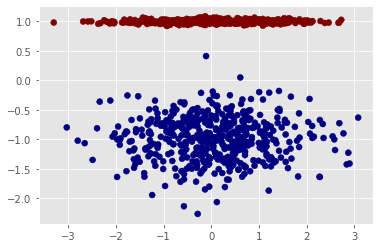

In [2]:
separable = False
while not separable:
    samples = make_classification(n_samples=1000, n_features=2, n_redundant=0, n_informative=1, n_clusters_per_class=1, flip_y=-1)
    red = samples[0][samples[1] == 0]
    blue = samples[0][samples[1] == 1]
    separable = any([red[:, k].max() < blue[:, k].min() or red[:, k].min() > blue[:, k].max() for k in range(2)])

red_labels = np.zeros(len(red))
blue_labels = np.ones(len(blue))

labels = np.append(red_labels, blue_labels)
inputs = np.concatenate((red,blue),axis=0)

plt.scatter(inputs[:, 0], inputs[:, 1], cmap='jet', c=labels)

# Splitting our dataset into a train/test split

In [3]:
inputs = torch.Tensor(inputs)
labels = torch.Tensor(labels)

X_train, X_test, y_train,  y_test = train_test_split(inputs, labels, test_size=0.33, random_state=42)

# Pytorch Model

<img src='media/logistic_regression.png' width="400">
<img src='media/logistic_regression_function.png' width="400">

`Sigmoid Activation` transforms our linear regression output to a probability from 0 to 1. <br>
We can then take any probability greater than 0.5 as being 1 and below as being 0.
<img src='media/logistic_regresstion_sigmoid.png' width="400">

In [4]:
class LogisticRegression(torch.nn.Module):
    def __init__(self, input_dim, output_dim):
        super(LogisticRegression, self).__init__()
        self.linear = torch.nn.Linear(input_dim, output_dim)
        
    def forward(self, x):
        outputs = torch.sigmoid(self.linear(x))
        return outputs

In [5]:
input_dim = 2 # Two inputs x1 and x2 
output_dim = 1 # Two possible outputs
learning_rate = 0.01

model = LogisticRegression(input_dim, output_dim)
criterion = torch.nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [6]:
losses = []
losses_test = []
Iterations = []
itera = 0
epochs = 200_000
for epoch in tqdm(range(epochs), desc='Training Epochs'):
    x = X_train
    labels = y_train
    optimizer.zero_grad() # Setting our stored gradients equal to zero
    outputs = model(X_train)
    loss = criterion(torch.squeeze(outputs), labels) # [200,1] -squeeze-> [200]
    loss.backward() # Computes the gradient of the given tensor w.r.t. graph leaves 
    optimizer.step() # Updates weights and biases with the optimizer (SGD)
    
    itera += 1
    if itera % 10000 == 0:
        with torch.no_grad():
            # Calculating the loss and accuracy for the test dataset
            correct_test = 0
            total_test = 0
            outputs_test = torch.squeeze(model(X_test))
            loss_test = criterion(outputs_test, y_test)
            
            predicted_test = outputs_test.round().detach().numpy()
            total_test += y_test.size(0)
            correct_test += np.sum(predicted_test == y_test.detach().numpy())
            accuracy_test = 100 * correct_test/total_test
            losses_test.append(loss_test.item())
            
            # Calculating the loss and accuracy for the train dataset
            total = 0
            correct = 0
            total += y_train.size(0)
            correct += np.sum(torch.squeeze(outputs).round().detach().numpy() == y_train.detach().numpy())
            accuracy = 100 * correct/total
            losses.append(loss.item())
            Iterations.append(iter)
            
            print(f"Iteration: {iter}. \nTest - Loss: {loss_test.item():,.3f}. Accuracy: {accuracy_test:,.3f}")
            print(f"Train -  Loss: {loss.item():,.3f}. Accuracy: {accuracy:,.3f}\n")

Training Epochs:   5%|▉                | 10533/200000 [00:02<00:38, 4871.99it/s]

Iteration: <built-in function iter>. 
Test - Loss: 0.020. Accuracy: 99.697
Train -  Loss: 0.018. Accuracy: 100.000



Training Epochs:  11%|█▊               | 21058/200000 [00:04<00:32, 5520.82it/s]

Iteration: <built-in function iter>. 
Test - Loss: 0.013. Accuracy: 99.697
Train -  Loss: 0.010. Accuracy: 100.000



Training Epochs:  15%|██▌              | 30605/200000 [00:06<00:29, 5671.03it/s]

Iteration: <built-in function iter>. 
Test - Loss: 0.011. Accuracy: 99.697
Train -  Loss: 0.007. Accuracy: 100.000



Training Epochs:  21%|███▍             | 41051/200000 [00:08<00:30, 5176.80it/s]

Iteration: <built-in function iter>. 
Test - Loss: 0.010. Accuracy: 99.697
Train -  Loss: 0.005. Accuracy: 100.000



Training Epochs:  25%|████▎            | 50662/200000 [00:10<00:29, 5024.26it/s]

Iteration: <built-in function iter>. 
Test - Loss: 0.009. Accuracy: 99.697
Train -  Loss: 0.005. Accuracy: 100.000



Training Epochs:  31%|█████▏           | 61021/200000 [00:12<00:25, 5512.08it/s]

Iteration: <built-in function iter>. 
Test - Loss: 0.009. Accuracy: 99.697
Train -  Loss: 0.004. Accuracy: 100.000



Training Epochs:  35%|██████           | 70614/200000 [00:13<00:23, 5415.80it/s]

Iteration: <built-in function iter>. 
Test - Loss: 0.008. Accuracy: 99.697
Train -  Loss: 0.003. Accuracy: 100.000



Training Epochs:  41%|██████▉          | 81020/200000 [00:15<00:22, 5396.38it/s]

Iteration: <built-in function iter>. 
Test - Loss: 0.008. Accuracy: 99.697
Train -  Loss: 0.003. Accuracy: 100.000



Training Epochs:  45%|███████▋         | 90753/200000 [00:17<00:19, 5737.92it/s]

Iteration: <built-in function iter>. 
Test - Loss: 0.008. Accuracy: 99.697
Train -  Loss: 0.003. Accuracy: 100.000



Training Epochs:  50%|████████        | 100965/200000 [00:19<00:17, 5555.29it/s]

Iteration: <built-in function iter>. 
Test - Loss: 0.008. Accuracy: 99.697
Train -  Loss: 0.003. Accuracy: 100.000



Training Epochs:  55%|████████▊       | 110433/200000 [00:21<00:17, 5178.29it/s]

Iteration: <built-in function iter>. 
Test - Loss: 0.007. Accuracy: 99.697
Train -  Loss: 0.002. Accuracy: 100.000



Training Epochs:  61%|█████████▋      | 121029/200000 [00:23<00:15, 5053.96it/s]

Iteration: <built-in function iter>. 
Test - Loss: 0.007. Accuracy: 99.697
Train -  Loss: 0.002. Accuracy: 100.000



Training Epochs:  65%|██████████▍     | 130626/200000 [00:25<00:14, 4881.59it/s]

Iteration: <built-in function iter>. 
Test - Loss: 0.007. Accuracy: 99.697
Train -  Loss: 0.002. Accuracy: 100.000



Training Epochs:  70%|███████████▎    | 140756/200000 [00:27<00:13, 4512.56it/s]

Iteration: <built-in function iter>. 
Test - Loss: 0.007. Accuracy: 99.697
Train -  Loss: 0.002. Accuracy: 100.000



Training Epochs:  75%|████████████    | 150721/200000 [00:29<00:09, 5463.04it/s]

Iteration: <built-in function iter>. 
Test - Loss: 0.007. Accuracy: 99.697
Train -  Loss: 0.002. Accuracy: 100.000



Training Epochs:  80%|████████████▊   | 160740/200000 [00:31<00:07, 5482.92it/s]

Iteration: <built-in function iter>. 
Test - Loss: 0.007. Accuracy: 99.697
Train -  Loss: 0.002. Accuracy: 100.000



Training Epochs:  85%|█████████████▋  | 170712/200000 [00:33<00:05, 5623.37it/s]

Iteration: <built-in function iter>. 
Test - Loss: 0.007. Accuracy: 99.697
Train -  Loss: 0.002. Accuracy: 100.000



Training Epochs:  90%|██████████████▍ | 180802/200000 [00:35<00:03, 5419.48it/s]

Iteration: <built-in function iter>. 
Test - Loss: 0.007. Accuracy: 99.697
Train -  Loss: 0.002. Accuracy: 100.000



Training Epochs:  95%|███████████████▎| 190852/200000 [00:37<00:02, 4503.86it/s]

Iteration: <built-in function iter>. 
Test - Loss: 0.007. Accuracy: 99.697
Train -  Loss: 0.001. Accuracy: 100.000



Training Epochs: 100%|████████████████| 200000/200000 [00:39<00:00, 5125.01it/s]

Iteration: <built-in function iter>. 
Test - Loss: 0.007. Accuracy: 99.697
Train -  Loss: 0.001. Accuracy: 100.000



# Plotting the Results

In [7]:
def model_plot(model, inputs, y, title):
    parm = {}
    for name, param in model.named_parameters():
        parm[name]=param.detach().numpy()  
    
    w = parm['linear.weight'][0]
    b = parm['linear.bias'][0]
    plt.scatter(inputs[:, 0], inputs[:, 1], c=y,cmap='jet')

    u = np.linspace(inputs[:, 0].min(), inputs[:, 0].mainputs(), 2)
    plt.plot(u, (0.5-b-w[0]*u)/w[1])

    plt.xlim(inputs[:, 0].min()-0.5, inputs[:, 0].mainputs()+0.5)
    plt.ylim(inputs[:, 1].min()-0.5, inputs[:, 1].mainputs()+0.5)
    plt.title(title)
    plt.show()

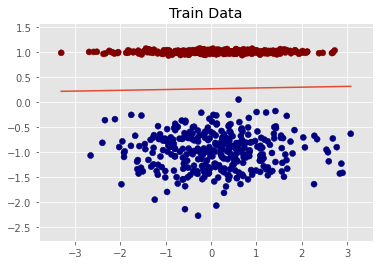

In [8]:
model_plot(model, X_train, y_train, 'Train Data')

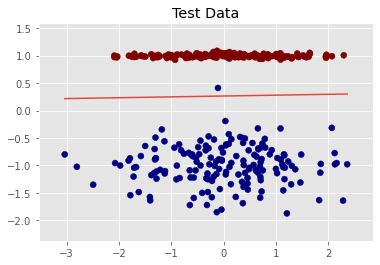

In [9]:
model_plot(model, X_test, y_test, 'Test Data')